In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
marketing = pd.read_csv('dataset/marketing.csv')

In [3]:
# The normal parse_dates parameter does not work for this dataset
# Instead, we will use the following code to convert the date columns to datetime
date_time = ['date_served', 'date_subscribed', 'date_canceled']
for i in date_time:
    marketing[i] = pd.to_datetime(marketing[i])

print(marketing['date_served'].dtype)

datetime64[ns]


## Examining the data

In [4]:
# Print the first five rows of the DataFrame
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [5]:
# Print the statistics of all columns
marketing.describe()

C:\Users\Shannon\AppData\Local\Temp\ipykernel_19724\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\Shannon\AppData\Local\Temp\ipykernel_19724\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\Shannon\AppData\Local\Temp\ipykernel_19724\4247376042.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mark

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [6]:
# Check column data types and non-missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


## Updating the data type of a column

In [7]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [8]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


## Adding new columns

In [9]:
# Mapping for channels
channel_dict = {'House Ads': 1, 'Instagram': 2, 'Facebook': 3, 'Email': 4, 'Push': 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [10]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_displayed'] == marketing['language_preferred'],
    "Yes", "No"
    )

In [11]:
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## Daily marketing reach by channel

In [12]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

## Visualizing daily marketing reach

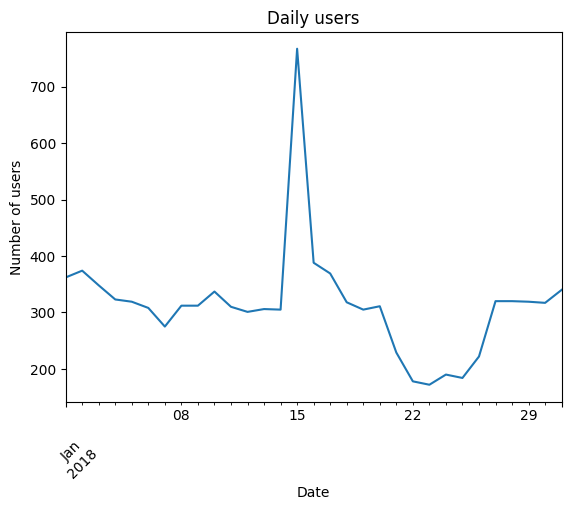

In [13]:
# Plot daily_subscribers
daily_users.plot()

plt.title('Daily users')
plt.xlabel('Date')
plt.ylabel('Number of users')

plt.xticks(rotation=45)

plt.show()

## Calculating conversion rate

In [14]:
# Calculate the number of people marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Conversion rate
conversion_rate = subscribers/total

print(round(conversion_rate*100, 2),'%')

13.89 %


## Calculating Retention Rate

In [15]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the number of people who remainded subscribed
retained = marketing[(marketing['is_retained']==True)&(marketing['converted']==True)]['user_id'].nunique()

# Calulate the retention rate
retention_rate = retained/total_subscribers

print(round(retention_rate*100, 2), '%')

67.09 %


## Comparing language conversion rate 

In [16]:
# Isolate English Speakers
english_speakers = marketing[marketing['language_preferred']=='English']

# Total number of English Speakers
total = english_speakers['user_id'].nunique()

# Number of english speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Conversion rate
conversion_rate = subscribers/total

print('English Speaker Conversion Rate:',round(conversion_rate*100, 2),'%')

English Speaker Conversion Rate: 13.25 %


In [18]:
# Group by language displayer and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

#Group by language displayer and count unique converison
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

#Conversion rate
language_conversion_rate = subscribers/total
language_conversion_rate

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64

## Aggregating by date

In [22]:
# Group by date_served and coutn unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate
daily_conversion_rate = subscribers/total
daily_conversion_rate = daily_conversion_rate*100

<Axes: xlabel='date_served'>

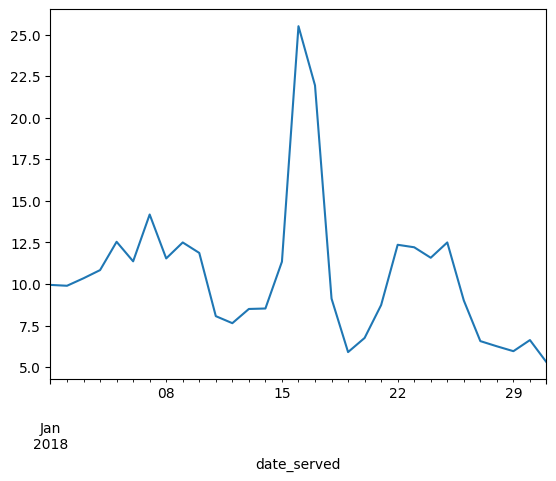

In [23]:
daily_conversion_rate.plot()